# Week 2 - Classification

This week, the tutorial questions is all about categorising soil, based on the soil composition the masses of different particle sizes. We tend to use a Cummulative Historam to plot the composition.

In [116]:
from typing import Dict
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class sample:
    def __init__(self):
        self.name: str | None = None
        self.mass: pd.DataFrame = pd.DataFrame(
            columns=["particle_size", "mass", "cum_mass", "percent_finer"]
        )
        self.category: str | None = None
        self.total_mass: float | None = None
        self.PL:float | None = None
        self.LL:float | None = None 
        self.PI:float | None = None

    def sum_mass(self):
        if self.mass.empty:
            raise ValueError("Mass data is empty.")

        # If mass is provided → compute total_mass, cum_mass, percent_finer
        if "mass" in self.mass and not self.mass["mass"].isnull().all():
            self.total_mass = float(self.mass["mass"].sum())

            if "cum_mass" not in self.mass or self.mass["cum_mass"].isnull().all():
                self.mass["cum_mass"] = self.mass["mass"].cumsum()

            if "percent_finer" not in self.mass or self.mass["percent_finer"].isnull().all():
                self.mass["percent_finer"] = (
                    self.mass["cum_mass"] / self.total_mass * 100
                )

        # If only percent_finer is provided → recompute cum_mass and total_mass as N/A
        elif "percent_finer" in self.mass and not self.mass["percent_finer"].isnull().all():
            self.total_mass = None  # no actual mass info
            self.mass["cum_mass"] = np.nan  # placeholder (not meaningful here)

        else:
            raise ValueError("Neither mass nor percent_finer data provided.")

    def D(self, n):
        self.sum_mass()
        return np.interp(n, self.mass["percent_finer"], self.mass["particle_size"])

    def plot_cf(self):
        self.sum_mass()

        # Ensure the curve starts at 0%
        x = [self.mass["particle_size"].min()] + list(self.mass["particle_size"])
        y = [0] + list(self.mass["percent_finer"])

        plt.figure(figsize=(10, 6))
        plt.plot(
            x,
            y,
            marker="o",
            color="blue",
            label="Cumulative Curve"
        )

        # horizontal line at 100%
        plt.axhline(y=100, color="r", linestyle="--")

        # titles and labels
        plt.title(f"Cumulative Mass Distribution - {self.name}")
        plt.xlabel("Particle Size (mm)")
        plt.ylabel("Percent Finer (%)")

        # log scale for x-axis
        plt.xscale("log")
        plt.xlim(0.001, 100)

        # set ticks for log axis
        from matplotlib.ticker import LogLocator
        plt.gca().xaxis.set_major_locator(LogLocator(base=10.0, subs=None, numticks=10))
        plt.gca().xaxis.set_minor_locator(LogLocator(base=10.0, subs=range(1, 10), numticks=10))

        plt.ylim(0, 100)  # y-axis from 0% to 100%
        plt.grid(True, which="both", ls="--", alpha=0.5)
        plt.legend()
        plt.show()
    def categorise(self):
        self.PI = self.LL - self.PL
        Cu = self.D(60)/self.D(10)
        Cc = (self.D(30)**2)/(self.D(10)*self.D(60))
        A_line = 0.73*(self.LL-20)
        if(self.D(50) > 0.075):
            if self.D(50)>4.75:
                #GW or GP
                if self.D(5) >= 0.075:
                    #GW or GP
                    if Cu >= 4 and 1 <= Cc <= 3:
                        self.category = "GW"
                    else:
                        self.category = "GP"
                elif(self.D(12)<=0.075):
                    #GW or GP
                    if self.PI <4:
                        self.category = "GM"
                    elif self.PI>7:
                        self.category = "GC"
                    else:
                        self.category = "GM/GC"
                else:
                    self.category = "GW/GP/GM/GC"
            else:
                if self.D(5) >= 0.075:
                    if Cu >= 4 and 1 <= Cc <= 3:
                        self.category = "SW"
                    else:
                        self.category = "SP"
                elif(self.D(12)<=0.075):
                    if self.PI <4:
                        self.category = "SM"
                    elif self.PI>7:
                        self.category = "SC"
                    else:
                        self.category = "SM/SC"
        else:
            print("COULD BE PT")
            if self.LL < 50:
                if self.PI > A_line:
                    self.category = "CL"
                else:
                    self.category = "ML/OL"
            else:
                if self.PI > A_line:
                    self.category = "CH"
                else:
                    self.category = "MH/OH"

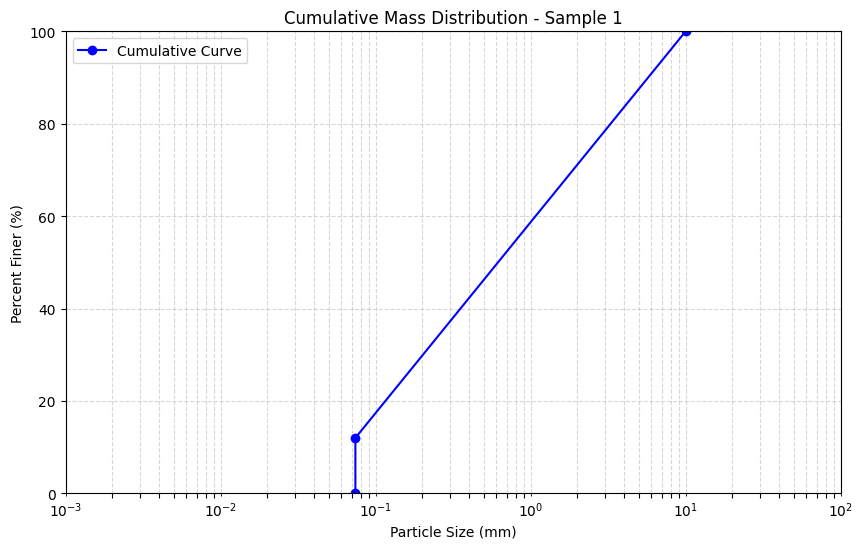

0.074 4.360227272727273 SC


In [118]:
s = sample()
s.mass = pd.DataFrame({
    "particle_size": [0.074,10],
    "percent_finer": [12,100]
})
s.PL = 22
s.LL = 30
s.name = "Sample 1"
s.categorise()
s.plot_cf()
print(s.D(12),s.D(50),s.category)
